# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (28)

**15/04/2024**

## Aplicar un caso de uso (*Time Series Forecasting*)

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

En esta sesión intentaremos predecir las **[ventas mensuales de corticosteroides en Australia](https://pkg.robjhyndman.com/fpp2-package/reference/h02.html#format:~:text=Monthly%20corticosteroid%20drug%20subsidy%20in%20Australia%20from%201991%20to%202008.)**. Estos medicamentos se conocen como **fármacos H02** según el esquema de clasificación Anatómico Terapéutico Químico (_ATC_) y se utilizan principalmente por sus efectos **anti-inflamatorios** e inmunosupresores. Por ejemplo __Dexametasona__ y __Betametasona__ son algunos ejemplos de medicamentos de la clase H02.

Dascargamos la serie temporal con las ventas mensuales en **millones de dólares** en fármacos **H02** que se han recetado en el **sistema de salud Australiano** entre los años de **1991 y 2008**.

In [3]:
df = pd.read_csv('dataset_h02.csv')
df

,fecha,venta_h02
0,1992-04-01,0.379808
1,1992-05-01,0.361801
2,1992-06-01,0.410534
3,1992-07-01,0.483389
4,1992-08-01,0.475463
...,...,...
190,2008-02-01,0.761822
191,2008-03-01,0.649435
192,2008-04-01,0.827887
193,2008-05-01,0.816255


In [4]:
# Definir un rango de fechas con pasos fijos
fechas = pd.date_range(start=df['fecha'].values[0], end=df['fecha'].values[-1], freq='MS')

# Asignar a las fechas como los índices del DataFrame
df.set_index(fechas, inplace=True)

# Quitar la columna 'fecha' de la tabla
df.drop(columns='fecha', inplace=True)

df

,venta_h02
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887
2008-05-01,0.816255


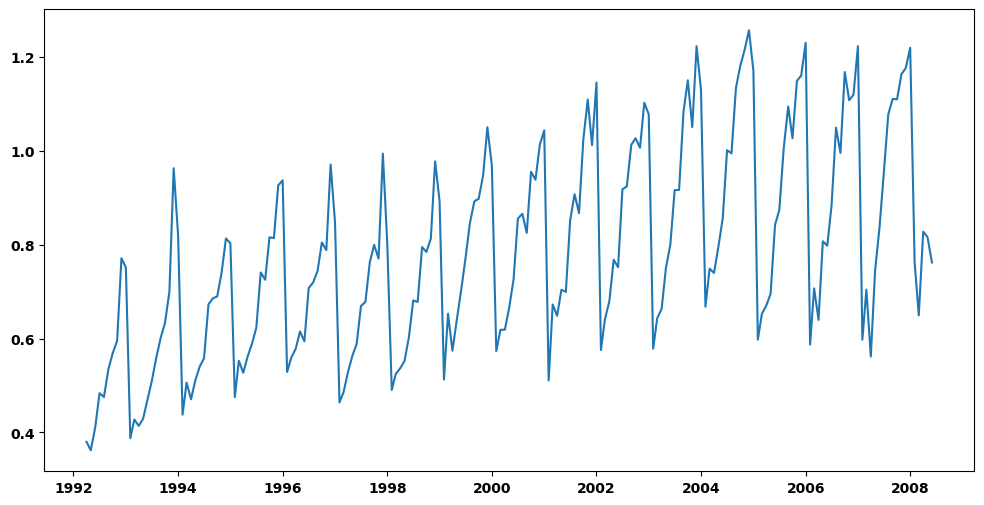

In [5]:
# Visualizamos los datos preparados
plt.plot(df)
plt.show()

In [6]:
# Las gráficas interactivas ayudan bastante a los analistas de datos, sobre todo a la hora de analizar y explorar las series temporales
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['venta_h02'],
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas mensuales de corticosteroides (H02) en Australia",
                  title_font_size=26,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de dólares (A$)'
                  )

fig.show()

---

### **`Ejercicio 28.1`**

**`28.1.1`** Aplica una descomposición de la serie temporal mediante el método `STL` y visualiza los componentes correspondientes. Describe la tendencia y la estacionalidad si son presentes en la serie temporal.

**`28.1.2`** Saca la gráfica de ***correlograma*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica: 

 - `lags=60`

**`28.1.3`** Saca la gráfica de ***Autocorrelación parcial*** para la serie temporal, considerando el método con los retrasos indicados y analiza los patrones que ves presente en esta gráfica: 

 - `lags=48`
 - `method='ywm'`

**`28.1.4`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos: 

 - `win = 12`

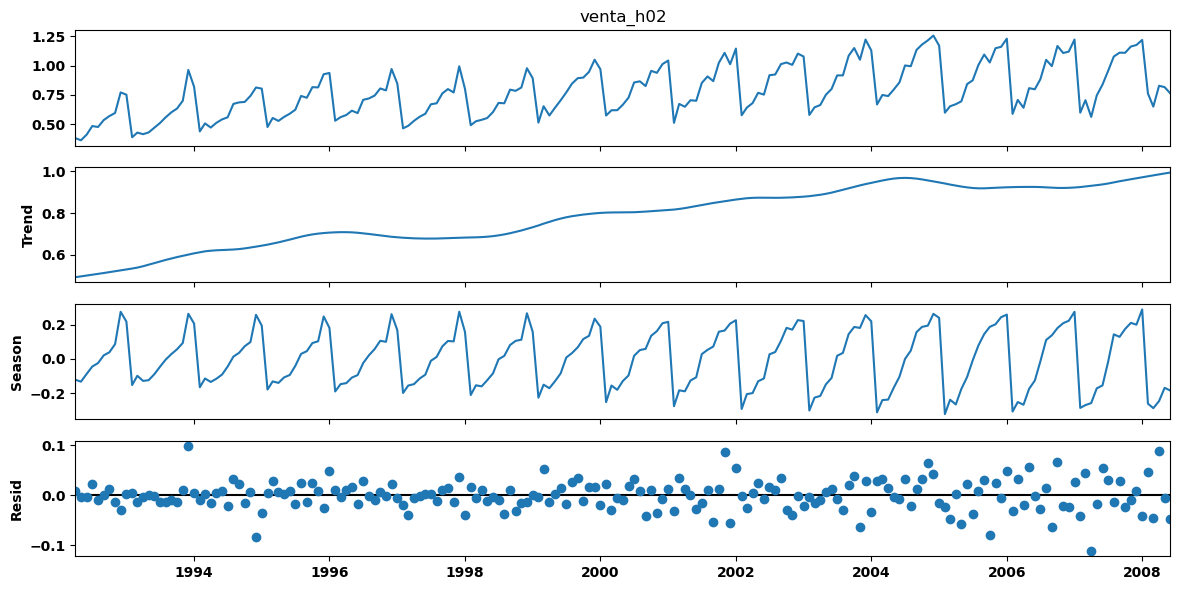

In [7]:
# Ejercicio 28.1.1
from statsmodels.tsa.seasonal import STL

df_seasonal = STL(df['venta_h02']).fit()
df_seasonal.plot()
plt.show()

#### Análisis 28.1.1
Se identifica una tendencia ascendente, lo que refleja un incremento a lo largo del tiempo. Además, la estacionalidad es evidente en los datos, mostrando cómo las ventas experimentan altibajos en diferentes épocas del año, con diciembre marcando el máximo de cifras más altas de ventas. 

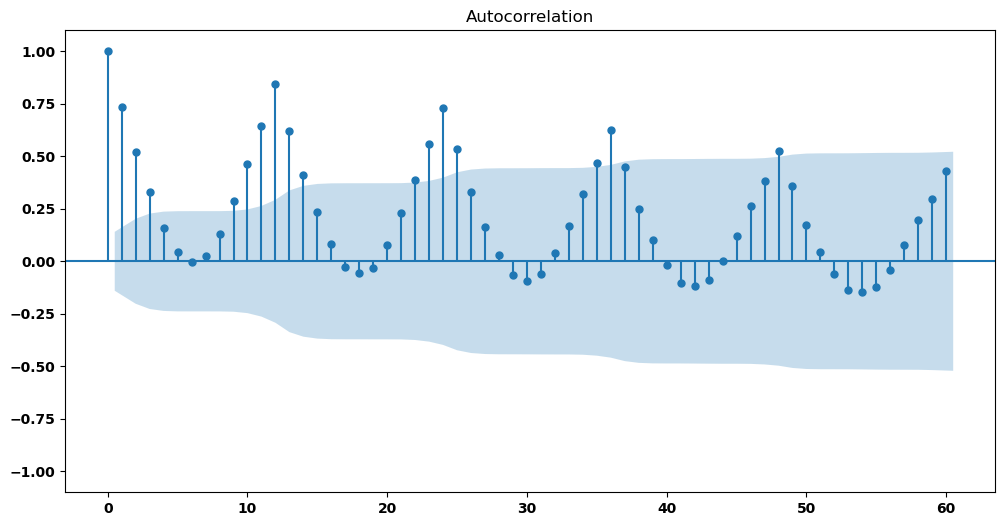

In [8]:
# Ejercicio 28.1.2
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df, lags=60)
plt.ylim(-1.1,1.1)
plt.show()

#### Análisis 28.1.2
La gráfica tiene un patrón oscilatorio, donde se observa que, a medida que se suceden los retrasos, el valor tiende a acercase al cero en la parte del eje positivo, mientras que en la parte del eje negativo, el valor incrementa y se distancia más de 0. 

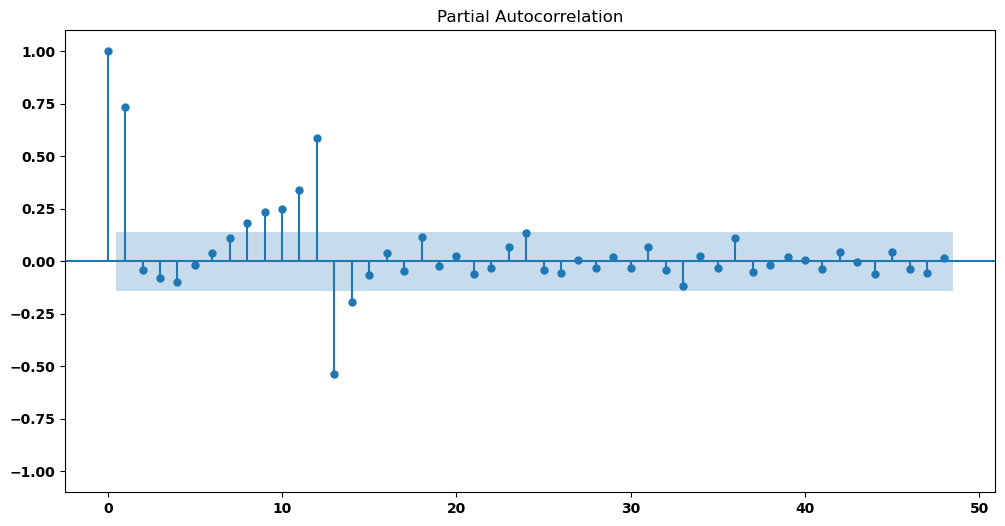

In [9]:
# Ejercicio 28.1.3
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df,
          lags=48,
          method='ywm')
plt.ylim(-1.1,1.1)
plt.show()

#### Análisis 28.1.3
En este caso, se complica bastante el ejercicio de buscar un patrón que se respete, con valores muy cercanos al 0 durante en gran parte de los retrasos.

In [10]:
# Ejercicio 28.1.4
wins = 12
rolling_mean = df['venta_h02'].rolling(wins).mean().iloc[wins-1::wins]
rolling_std = df['venta_h02'].rolling(wins).std().iloc[wins-1::wins]

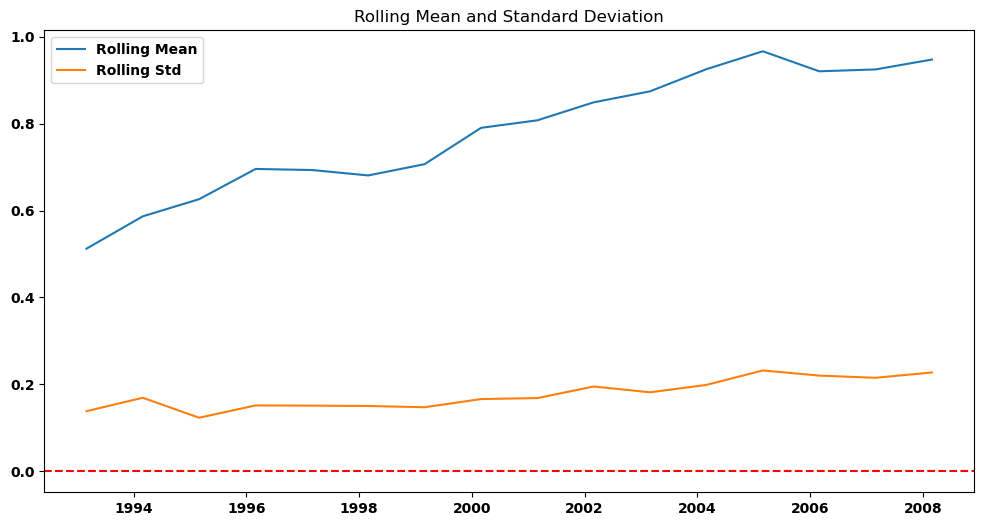

In [11]:
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label = 'Rolling Std')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

#### Análisis 28.1.4
El análisis de la serie temporal indica que la media muestra un incremento a lo largo de los años, mostrando una tendencia ascendente importante. En cuanto a la desviación estándar, aunque su tendencia no es tan marcada como la de la media, se destaca que desde el año 2000 en adelante, la desviación estándar se ha estabilizado en niveles superiores en comparación con los períodos previos.

---

### **`Ejercicio 28.2`**

Vamos a intentar a modelar la serie temporal con el objetivo de **predecir los valores mensuales del último año**. 

**`28.2.1`** Aplica el método de `Seasonal Naïve` a la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Grafica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.2.2`** Aplica el método estadístico de `Autoregresión - AR` considerando el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Después consigue estos puntos **y analiza los resultados obtenidos**:
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráficas de análisis del componente residual (curvas de diagnóstico, correlaciones con otras variables)
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción de este modelo con **sus intervalos de confianza** y los valores reales del último año. 
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.2.3`** Aplica el modelo de `SARIMA` para la serie temporal, utilizando el método de **`auto_arima`** según la búsqueda indicada considerando la estacionalidad de la serie. Después consigue estos puntos **y analiza los resultados obtenidos**:
- `start_p=1`
- `start_q=0`
- `start_P=1`
- `random_state=120`
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.


In [12]:
df_test = df.tail(12)

In [13]:
df_train = df.loc[df.index.isin(df_test.index)==False]

In [14]:
# Ejercicio 28.2.1
pred_ventas = pd.DataFrame(data=df_train.tail(12).values, index=df_test.index, columns=['pred'])

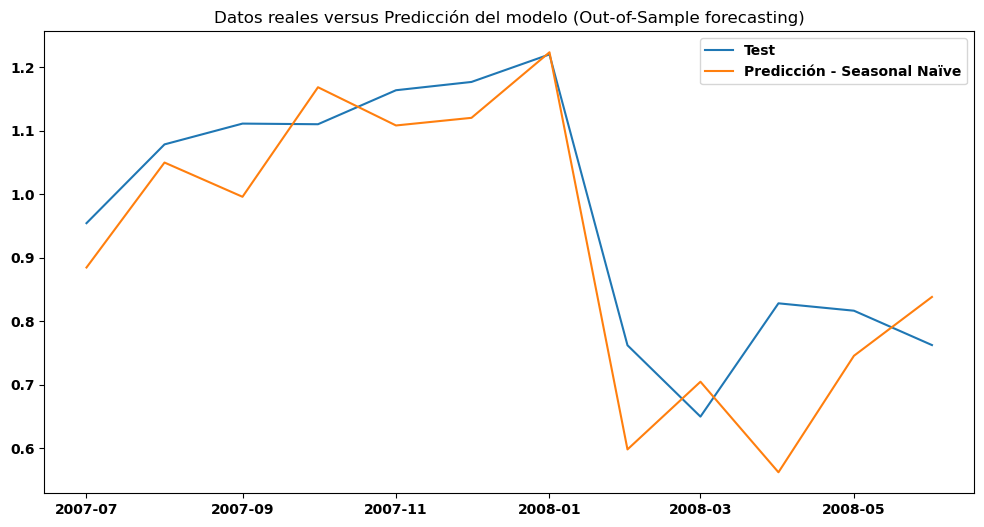

In [15]:
plt.plot(df_test, label='Test')
plt.plot(pred_ventas, label='Predicción - Seasonal Naïve')
plt.title("Datos reales versus Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_ventas))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, pred_ventas)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_ventas))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_ventas)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_ventas))

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 0.08494277166666668
Mean Absolute Percentage Error (MAPE): 9.686181826381263
Mean Squared Error (MSE): 0.011684411050918485
Root Mean Squared Error (RMSE): 0.10809445430232989
R^2 coefficient of determination: 0.6717644471769628


#### Análisis 28.2.1
La evaluación del modelo muestra que los valores de R^2 alcanzan 0.67. Por otro lado, el modelo presenta un MAPE del 9%. Este porcentaje, sin ser excesivamente elevado, indica que todavía existe margen para optimizar el modelo.

In [17]:
# Ejercicio 28.2.2
from statsmodels.tsa.ar_model import AutoReg

modelo_autoreg = AutoReg(df_train, lags=48)

In [18]:
fit_autoreg = modelo_autoreg.fit()

fit_autoreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              venta_h02   No. Observations:                  183
Model:                    AutoReg(48)   Log Likelihood                 246.028
Method:               Conditional MLE   S.D. of innovations              0.039
Date:                Sat, 20 Apr 2024   AIC                           -392.057
Time:                        18:23:41   BIC                           -246.793
Sample:                    04-01-1996   HQIC                          -333.026
                         - 06-01-2007                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0506      0.030      1.710      0.087      -0.007       0.109
venta_h02.L1     -0.0349      0.086     -0.403      0.687      -0.204       0.135
venta_h02.L2      0.4420      0.087      5.101      0.000       0.272       0.612
venta_h02.L3      0.4070      0.095      4.291      0.000       0.221       0.593
venta_h02.L4     -0.0464      0.101     -0.460      0.645      -0.244       0.151
venta_h02.L5     -0.0189      0.102     -0.186      0.853      -0.218       0.180
venta_h02.L6     -0.0014      0.101     -0.014      0.989      -0.200       0.197
venta_h02.L7      0.0753      0.101      0.745      0.456      -0.123       0.273
venta_h02.L8      0.0044      0.100      0.044      0.965      -0.192       0.201
venta_h02.L9      0.0547      0.100      0.544      0.586      -0.142       0.251
venta_h02.L10    -0.0785      0.099     -0.790      0.430      -0.273       0.116
venta_h02.L11    -0.1979      0.094     -2.099      0.036      -0.383      -0.013
venta_h02.L12     0.5287      0.096      5.498      0.000       0.340       0.717
venta_h02.L13     0.1445      0.102      1.423      0.155      -0.055       0.344
venta_h02.L14    -0.1845      0.103     -1.793      0.073      -0.386       0.017
venta_h02.L15    -0.2978      0.101     -2.938      0.003      -0.497      -0.099
venta_h02.L16     0.0130      0.100      0.130      0.896      -0.183       0.209
venta_h02.L17     0.0425      0.100      0.425      0.671      -0.154       0.239
venta_h02.L18     0.0159      0.102      0.157      0.876      -0.183       0.215
venta_h02.L19    -0.1526      0.102     -1.500      0.134      -0.352       0.047
venta_h02.L20    -0.1827      0.102     -1.790      0.073      -0.383       0.017
venta_h02.L21     0.0314      0.106      0.297      0.766      -0.176       0.238
venta_h02.L22     0.0621      0.106      0.586      0.558      -0.145       0.270
venta_h02.L23     0.3064      0.104      2.955      0.003       0.103       0.510
venta_h02.L24     0.0642      0.107      0.597      0.550      -0.146       0.275
venta_h02.L25    -0.1334      0.108     -1.236      0.217      -0.345       0.078
venta_h02.L26     0.1014      0.106      0.952      0.341      -0.107       0.310
venta_h02.L27     0.1550      0.106      1.459      0.145      -0.053       0.363
venta_h02.L28    -0.0563      0.100     -0.566      0.571      -0.251       0.139
venta_h02.L29    -0.2022      0.099     -2.037      0.042      -0.397      -0.008
venta_h02.L30    -0.1102      0.099     -1.116      0.265      -0.304       0.083
venta_h02.L31     0.0337      0.098      0.344      0.731      -0.159       0.226
venta_h02.L32     0.1788      0.100      1.787      0.074      -0.017       0.375
venta_h02.L33    -0.2030      0.101     -2.005      0.045      -0.402      -0.005
venta_h02.L34    -0.0346      0.103     -0.338      0.736      -0.236       0.166
venta_h02.L35     0.0658      0.100      0.655      0.512      -0.131       0.263
venta_h02.L36     0.3031      0.101      3.

In [19]:
estimacion_autoreg = fit_autoreg.fittedvalues
estimacion_autoreg

1996-04-01    0.550499
1996-05-01    0.550105
1996-06-01    0.593512
1996-07-01    0.711574
1996-08-01    0.784991
                ...   
2007-02-01    0.573133
2007-03-01    0.696251
2007-04-01    0.587653
2007-05-01    0.791711
2007-06-01    0.780042
Freq: MS, Length: 135, dtype: float64

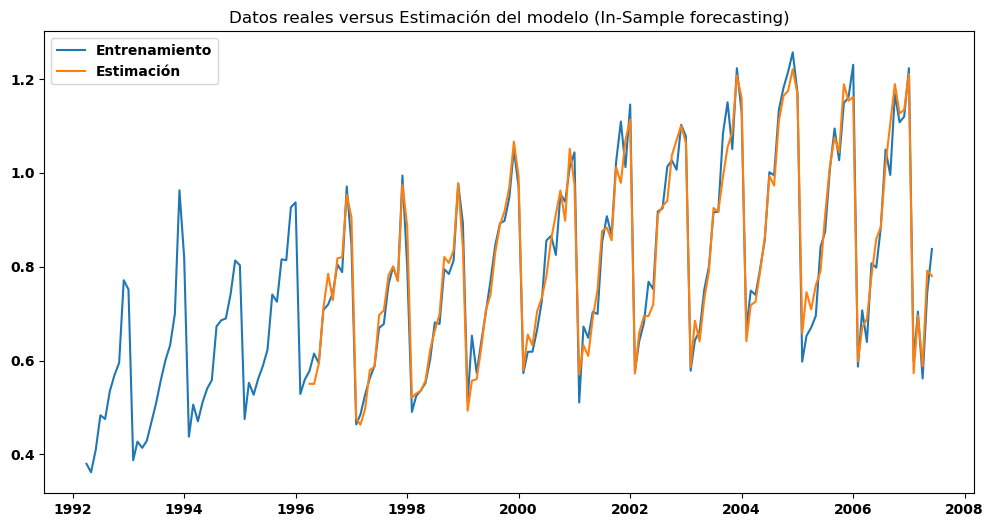

In [20]:
plt.plot(df_train, label='Entrenamiento')
plt.plot(estimacion_autoreg, label='Estimación')
plt.title("Datos reales versus Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

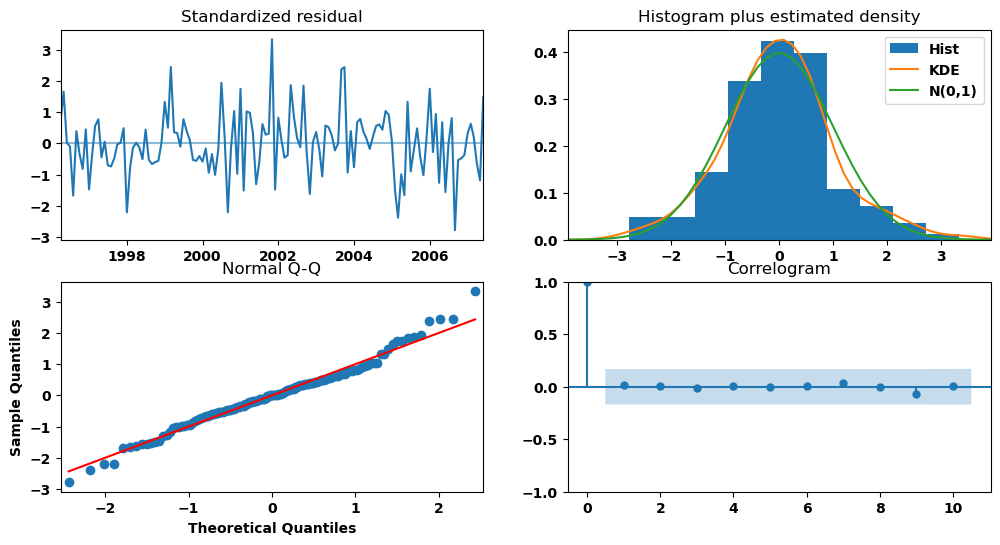

In [21]:
fit_autoreg.plot_diagnostics()
plt.show()

In [22]:
fit_autoreg.predict(start=df_test.index[0],
               end=df_test.index[-1])

2007-07-01    0.896650
2007-08-01    1.043430
2007-09-01    1.014030
2007-10-01    1.216538
2007-11-01    1.165268
2007-12-01    1.197656
2008-01-01    1.163550
2008-02-01    0.619112
2008-03-01    0.716028
2008-04-01    0.676230
2008-05-01    0.827267
2008-06-01    0.867919
Freq: MS, dtype: float64

In [23]:
pred_autoreg = fit_autoreg.forecast(steps=12)

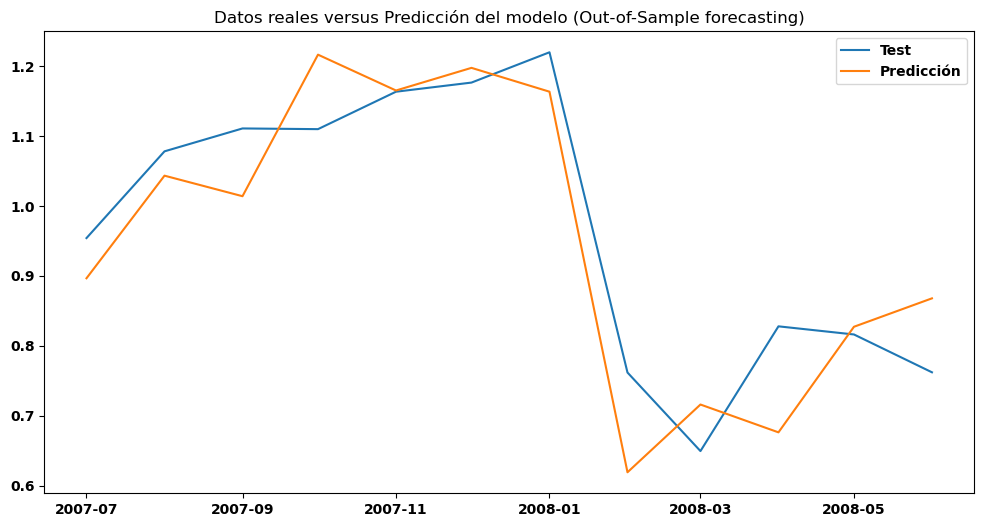

In [24]:
plt.plot(df_test, label='Test')
plt.plot(pred_autoreg, label='Predicción')
plt.title("Datos reales versus Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [25]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=df_train['venta_h02'],
    x=df_train.index,
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    y=pred_autoreg,
    x=pred_autoreg.index,
    name="Predicción (AutoReg)",
    mode="markers+lines"
    ))

fig.add_trace(go.Scatter(
    y=df_test['venta_h02'],
    x=df_test.index,
    name="Test",
    mode="lines"
    ))

fig.update_layout(title="Ventas de corticosteroides en Australia",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Ventas'
                  )

fig.show()

In [26]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_autoreg))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, pred_autoreg)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_autoreg))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_autoreg)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_autoreg))

Mean Absolute Error (MAE): 0.07106164003800573
Mean Absolute Percentage Error (MAPE): 8.056246464874434
Mean Squared Error (MSE): 0.007334059579440947
Root Mean Squared Error (RMSE): 0.08563912411649799
R^2 coefficient of determination: 0.7939734326356434


#### Análisis 28.2.2
El modelo muestra una mejora en métricas como el R^2, alcanzando un valor de 0.79, y un porcentaje de error del 8.05%. A pesar de estos avances, aún existe espacio para mejroar su desarrollo. En relación a las gráficas de diagnóstico, la distribución de los residuos forma una curva normal, lo que es indica que el  modelo funciona bien. Además, el correlograma muestra valores cercanos a cero y la estandarización no muestra patrones aparentemente.

In [27]:
# Ejercicio 28.2.3
from pmdarima.arima import auto_arima

fit_auto_sarima_method = auto_arima(df_train,
                                    start_p=1,
                                    start_q=0,
                                    start_P=1,
                                    m=12,
                                    seasonal=True,
                                    random_state=120)

In [28]:
fit_auto_sarima_method.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  183
Model:             SARIMAX(4, 0, 0)x(2, 1, [1], 12)   Log Likelihood                 272.345
Date:                              Sat, 20 Apr 2024   AIC                           -526.691
Time:                                      18:24:56   BIC                           -498.416
Sample:                                  04-01-1992   HQIC                          -515.218
                                       - 06-01-2007                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0105      0.005      2.255      0.024       0.001       0.020
ar.L1          0.1875      0.075      2.507      0.012       0.041       0.334
ar.L2          0.4135      0.078      5.325      0.000       0.261       0.566
ar.L3          0.2630      0.076      3.459      0.001       0.114       0.412
ar.L4         -0.1518      0.079     -1.932      0.053      -0.306       0.002
ar.S.L12      -0.0120      0.219     -0.055      0.956      -0.441       0.417
ar.S.L24      -0.2659      0.129     -2.061      0.039      -0.519      -0.013
ma.S.L12      -0.4132      0.226     -1.831      0.067      -0.855       0.029
sigma2         0.0023      0.000     10.099      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.07
Prob(Q):                              0.99   Prob(JB):                         0.08
Heteroskedasticity (H):               1.82   Skew:                            -0.26
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
fit_auto_sarima_method.predict_in_sample()

1992-04-01    0.028496
1992-05-01    0.028496
1992-06-01    0.028496
1992-07-01    0.028496
1992-08-01    0.028496
                ...   
2007-02-01    0.600135
2007-03-01    0.730941
2007-04-01    0.701220
2007-05-01    0.782178
2007-06-01    0.772311
Freq: MS, Name: predicted_mean, Length: 183, dtype: float64

In [30]:
estimacion_auto_sarima = fit_auto_sarima_method.predict_in_sample()

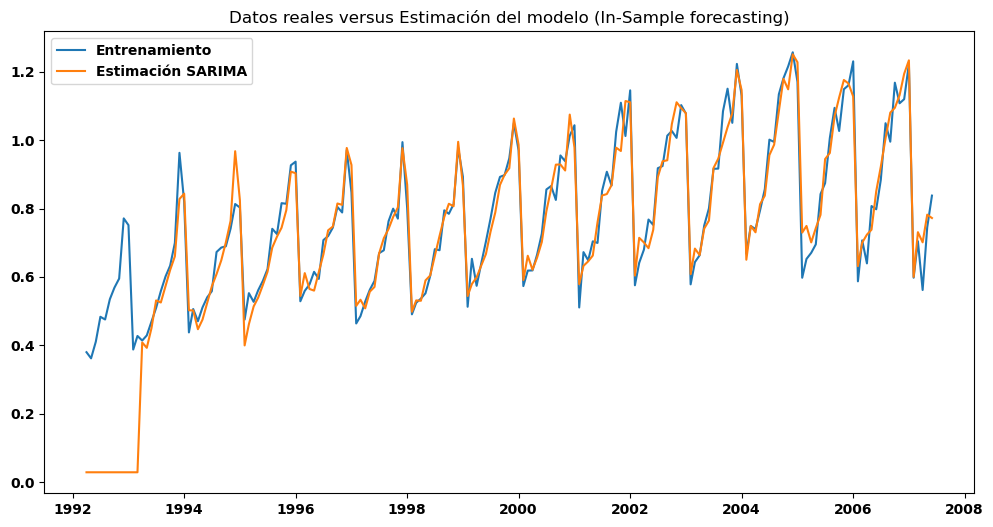

In [31]:
plt.plot(df_train, label='Entrenamiento')
plt.plot(estimacion_auto_sarima, label='Estimación SARIMA')
plt.title("Datos reales versus Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

In [32]:
prediccion_auto_sarima = fit_auto_sarima_method.predict(12)
prediccion_auto_sarima

2007-07-01    0.893679
2007-08-01    1.040174
2007-09-01    1.064487
2007-10-01    1.184083
2007-11-01    1.167938
2007-12-01    1.201444
2008-01-01    1.234991
2008-02-01    0.654393
2008-03-01    0.741134
2008-04-01    0.669774
2008-05-01    0.791627
2008-06-01    0.892889
Freq: MS, dtype: float64

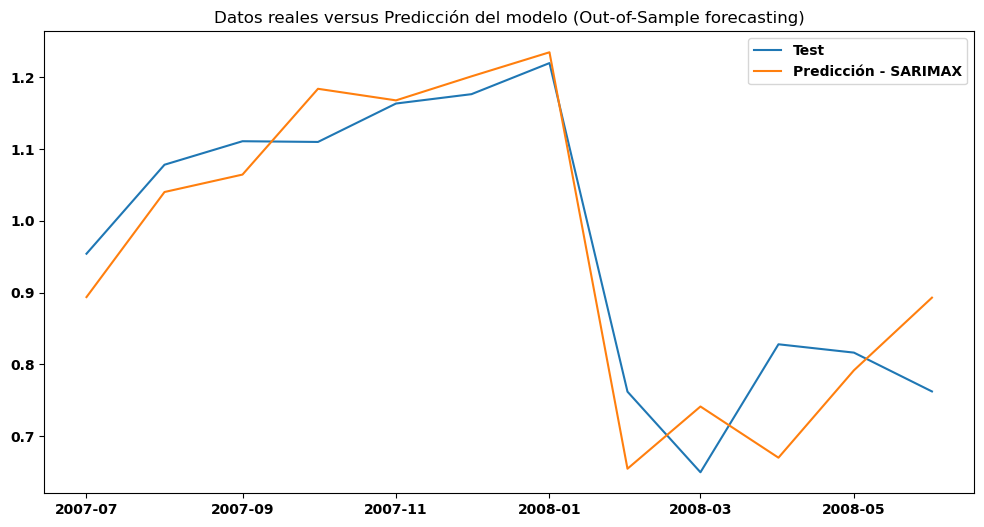

In [33]:
plt.plot(df_test, label='Test')
plt.plot(prediccion_auto_sarima, label='Predicción - SARIMAX')
plt.title("Datos reales versus Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [34]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, prediccion_auto_sarima))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test, prediccion_auto_sarima)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, prediccion_auto_sarima))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, prediccion_auto_sarima)))
print('R^2 coefficient of determination:', r2_score(df_test, prediccion_auto_sarima))

Mean Absolute Error (MAE): 0.06466973302916519
Mean Absolute Percentage Error (MAPE): 7.662011339017476
Mean Squared Error (MSE): 0.0063559970933184835
Root Mean Squared Error (RMSE): 0.07972450748244535
R^2 coefficient of determination: 0.8214489193699658


#### Análisis 28.2.3
Se destaca una mejora en el R^2, que ahora tieene un valor de 0.82, y el MAPE, con un porcentaje de error del 7.63%.

---

### **`Ejercicio 28.3`**

**`28.3.1`** Construye un modelo de regresión con el método ___`CatBoostRegressor`___ (con sus hiperparámetros por defecto). Al igual que el modelo _AR_ (punto `28.2.2`) introduce el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Posteriormente, calcula las métricas de calidad del modelo **y analiza los resultados obtenidos**:  
- `random_state=77`
- `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.3.2`** Realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de retrasos, teniendo en cuenta los siguientes puntos:

- Hasta el último retraso estimado en el modelo anterior inclusive (_`p`_)
- Modelo: **CatBoostRegressor**
- `random_state=77`
- `silent=True`

**`28.3.3`** Teniendo en cuenta el valor óptimo calculado en el paso anterior para los retrasos, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de **árboles**.
- inicio: **5** árboles
- fin: **200** árboles inclusive
- con pasos **de 5 en 5**

**`28.3.4`** Teniendo en cuenta los valores óptimos calculados en los pasos anteriores, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de la **profundidad máxima**.
- Desde **2** hasta **10** no inclusive

**`28.3.5`** Construye un modelo con los hiperparámetros óptimos que hayas calculado en los puntos anteriores y calcula las métricas de calidad del modelo y de sus predicciones:

  - `random_state=77`
  - `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`28.3.6`** Saca la gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_" y **analiza y compara los resultados** de este modelo con los modelos anteriores.

**`28.3.7`** Realiza un análisis tipo `In-Sample Model Evaluation` para evaluar la calidad del modelo ajustado mediante siguientes puntos **y explica los resultados obtenidos**:  

- Calcula las estimaciones del modelo ajustado (_`fitted values`_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_" para el periodo de entrenamiento
- Gráfica diagonal de "_Valores reales vs. valors estimados (In-Sample forecasting)_"
- Gráfica de "_Componente residual del modelo (In-Sample fitted errores)_"
- Gráficas de "_Histograma del componente residual (In-sample errors)_"
- Gráfica de la ***Desviación estándar*** y su evolución a lo largo de tiempo para **el componente residual**, considerando una ventana con el tamaño indicado:

   - `win = 12`
- El **correlograma** y la gráfica de **autocorrelación parcial** para **el componente residual** considerando el método con los retrasos indicados:

 - `lags=37`
 - `method='ywm'`
- Gráficas de posibles correlaciones entre **el componente residual** y **los valores relaes y estimados**

**`28.3.8`** Saca la gráfica **interactiva** con el histórico, las predicciones de los modelos desarrollados y los valores reales del último año:

- Predicción del modelo **AR** (`28.2.2`)
- Predicción del modelo **SARIMA** (`28.2.3`)
- Predicción del modelo **CatBoostRegressor** (`28.3.5`)

**`28.3.9`** Explica **cuál sería el mejor modelo que elegirías** para esta caso de uso. Además, describe **¿qué tipo de uso podría tener este ejercicio predictivo?** en tu opinión y que sobre todo **para qué fin podría servir las prediciones de estas ventas mensuales.**

In [35]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Ejercicio 28.3.1
from catboost import CatBoostRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

catboost_mod = ForecasterAutoreg(
                regressor = CatBoostRegressor(random_state=77, silent=True),
                lags = 48
                )

In [37]:
catboost_mod.fit(y=df_train['venta_h02'])
prediccion_catboost = catboost_mod.predict(steps=12)

In [38]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, prediccion_catboost))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, prediccion_catboost)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, prediccion_catboost))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, prediccion_catboost)))
print('R^2 coefficient of determination:', r2_score(df_test, prediccion_catboost))

Mean Absolute Error (MAE): 0.0696226114195722
Mean Absolute Percentage Error: 7.838613721636127
Mean Squared Error (MSE): 0.006350856380136979
Root Mean Squared Error (RMSE): 0.07969226047827342
R^2 coefficient of determination: 0.8215933309989031


#### Análisis 28.3.1
El modelo anterior y el actual, tienen un R^2 de 0.82. Sin embargo, este último modelo tiene un MAPE ligeramente mayor, con un 7.83%, superando al anterior. A pesar de este incremento, el modelo sigue siendo de los mejores modelos de esta sesión.

El mejor valor de retrasos podría ser = 34  que consigue un R2 = 0.8564726331942636


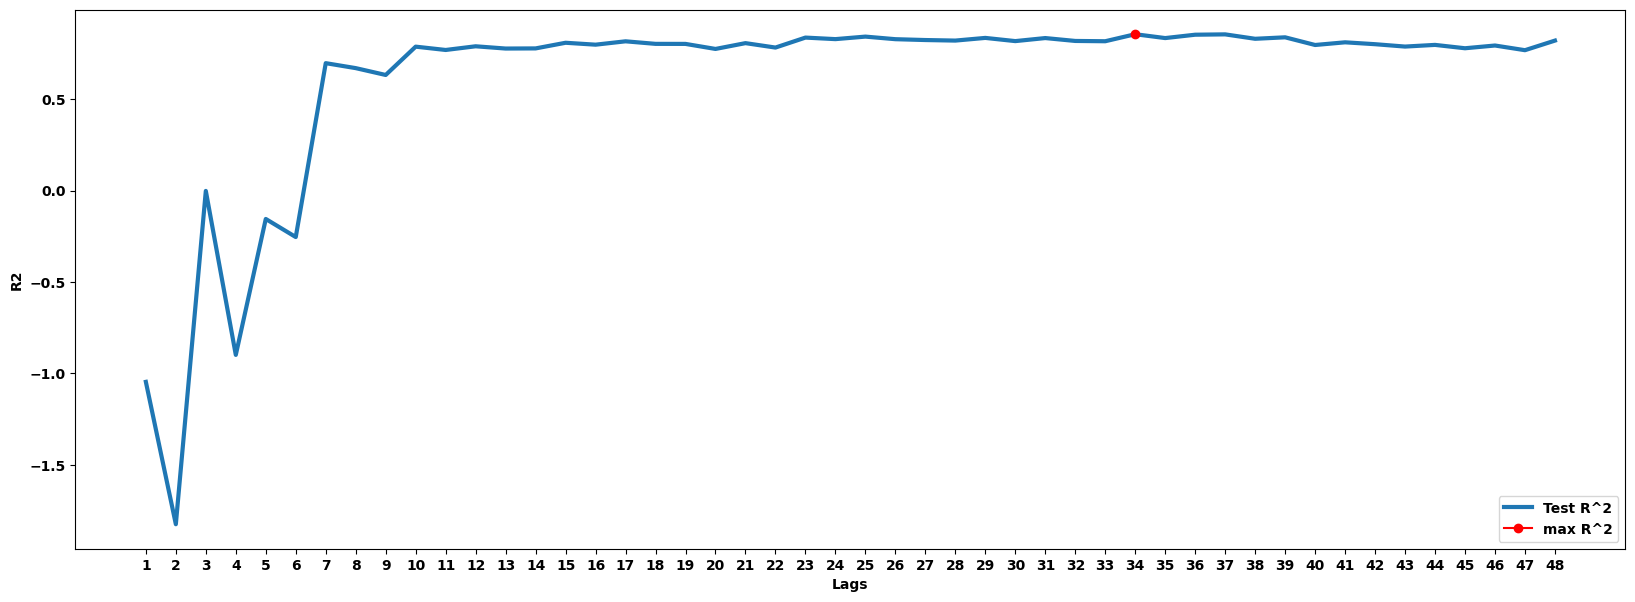

In [39]:
# Ejercicio 28.3.2
hiper_param_28_3_2 = np.arange(1, 49).tolist()
test_r2_28_3_2 = np.zeros(len(hiper_param_28_3_2))

for i in range(len(hiper_param_28_3_2)):
    modelo_catboost_28_3_2 = ForecasterAutoreg(
                    regressor = CatBoostRegressor(random_state=77, silent=True),
                    lags = hiper_param_28_3_2[i]
                )
    modelo_catboost_28_3_2.fit(y=df_train['venta_h02'])
    test_r2_28_3_2[i] = r2_score(df_test, modelo_catboost_28_3_2.predict(steps=12))

print("El mejor valor de retrasos podría ser =", hiper_param_28_3_2[np.argmax(test_r2_28_3_2)],
      " que consigue un R2 =", max(test_r2_28_3_2))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_28_3_2, test_r2_28_3_2, linewidth=3, label='Test R^2')
plt.plot(hiper_param_28_3_2[np.argmax(test_r2_28_3_2)], max(test_r2_28_3_2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_28_3_2)
plt.xlabel('Lags')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()


El mejor valor de número de arboles podría ser = 100  que consigue un R2 = 0.8824119211239088


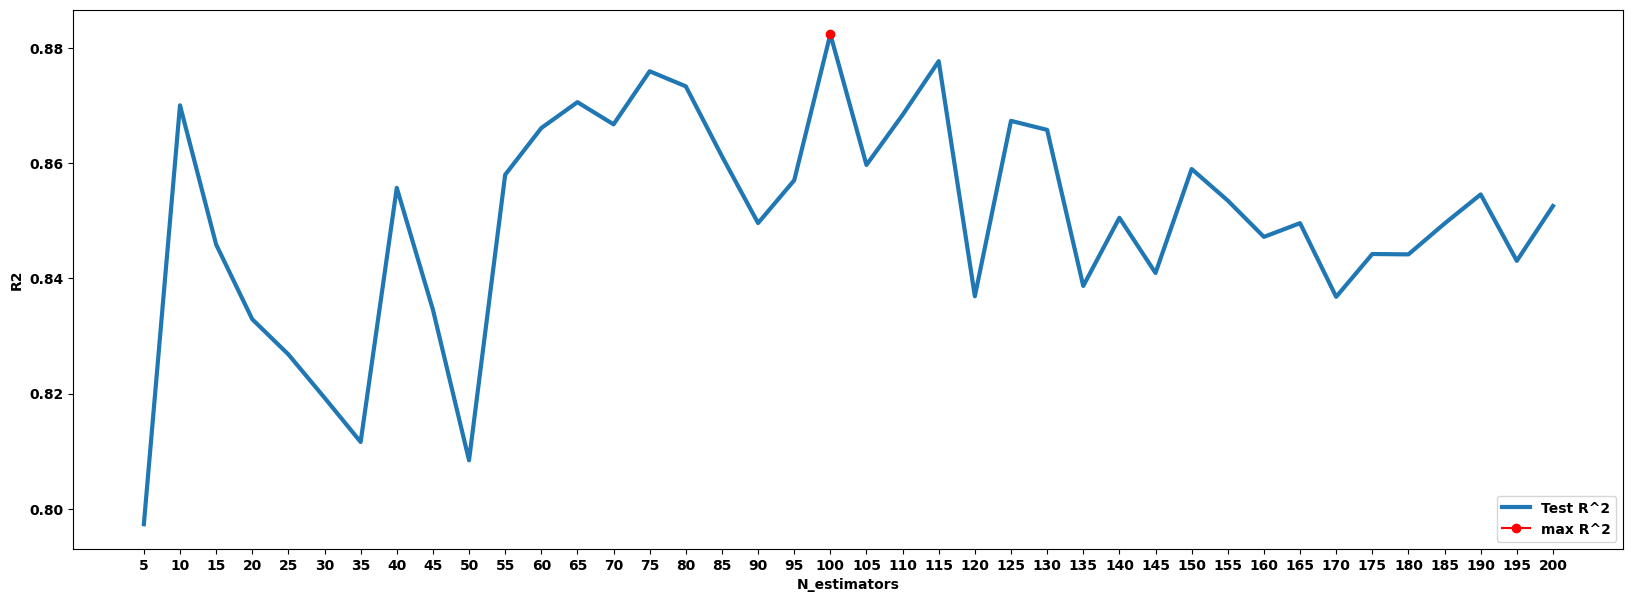

In [40]:
# Ejercicio 28.3.3
hiper_param_28_3_3 = np.arange(5, 201, 5)
test_r2_28_3_3 = np.zeros(hiper_param_28_3_3.size)

for i in range(hiper_param_28_3_3.size):
    modelo_catboost_28_3_3 = ForecasterAutoreg(
                    regressor = CatBoostRegressor(
                        n_estimators=hiper_param_28_3_3[i],
                        random_state=77,
                        silent=True
                        ),
                    lags = 34
                )
    modelo_catboost_28_3_3.fit(y=df_train['venta_h02'])
    test_r2_28_3_3[i] = r2_score(df_test, modelo_catboost_28_3_3.predict(steps=12))

print("El mejor valor de número de arboles podría ser =", hiper_param_28_3_3[np.argmax(test_r2_28_3_3)],
      " que consigue un R2 =", max(test_r2_28_3_3))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_28_3_3, test_r2_28_3_3, linewidth=3, label='Test R^2')
plt.plot(hiper_param_28_3_3[np.argmax(test_r2_28_3_3)], max(test_r2_28_3_3),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_28_3_3)
plt.xlabel('N_estimators')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()


El mejor valor de profundidad podría ser = 6  que consigue un R2 = 0.8824119211239088


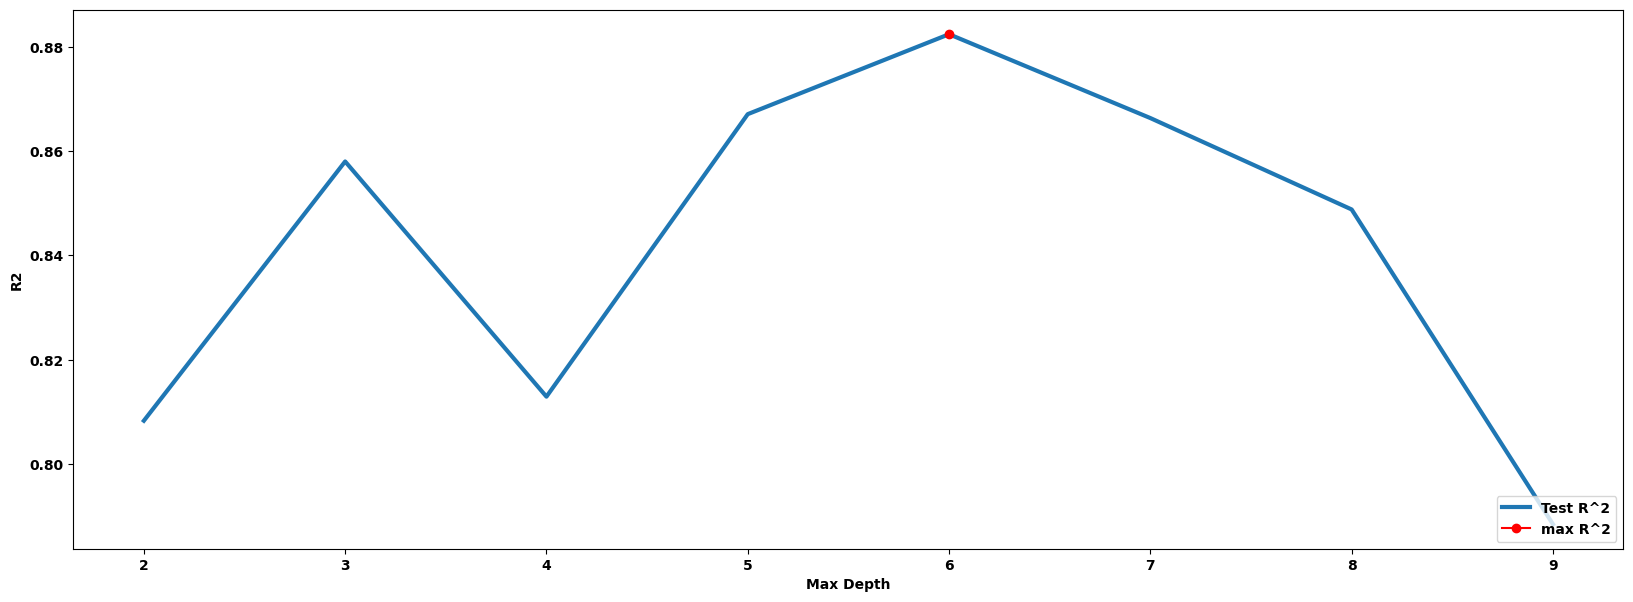

In [41]:
# Ejercicio 2.3.4
hiper_param_28_3_4 = np.arange(2, 10)
test_r2_28_3_4 = np.zeros(hiper_param_28_3_4.size)

for i in range(hiper_param_28_3_4.size):
    modelo_catboost_28_3_4 = ForecasterAutoreg(
                    regressor = CatBoostRegressor(
                        random_state=77,
                        silent=True,
                        n_estimators=100,
                        max_depth=hiper_param_28_3_4[i]),
                    lags = 34
                )
    modelo_catboost_28_3_4.fit(y=df_train['venta_h02'])
    test_r2_28_3_4[i] = r2_score(df_test, modelo_catboost_28_3_4.predict(steps=12))

print("El mejor valor de profundidad podría ser =", hiper_param_28_3_4[np.argmax(test_r2_28_3_4)],
      " que consigue un R2 =", max(test_r2_28_3_4))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_28_3_4, test_r2_28_3_4, linewidth=3, label='Test R^2')
plt.plot(hiper_param_28_3_4[np.argmax(test_r2_28_3_4)], max(test_r2_28_3_4),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_28_3_4)
plt.xlabel('Max Depth')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()


In [42]:
# Ejercicio 28.3.5
modelo_catboost_optimo = ForecasterAutoreg(
    regressor = CatBoostRegressor(max_depth=6, n_estimators=100, random_state=77, silent=True),
    lags = 34
)

modelo_catboost_optimo.fit(y=df_train['venta_h02'])

In [43]:
y_pred_catboost_optimo = modelo_catboost_optimo.predict(steps=12)

In [44]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, y_pred_catboost_optimo))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, y_pred_catboost_optimo)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, y_pred_catboost_optimo))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, y_pred_catboost_optimo)))
print('R^2 coefficient of determination:', r2_score(df_test, y_pred_catboost_optimo))

Mean Absolute Error (MAE): 0.050373994439311696
Mean Absolute Percentage Error: 5.634489943719529
Mean Squared Error (MSE): 0.00418585810238788
Root Mean Squared Error (RMSE): 0.06469820787616826
R^2 coefficient of determination: 0.8824119211239088


#### Análisis 28.3.5
La optimización de los hiperparámetros para el modelo ha hecho que el R^2 incremente hasta 0.88 y que disminuya el porcentaje de error a 5.63%. Estos resultados representan las métricas más favorables hasta el momento.

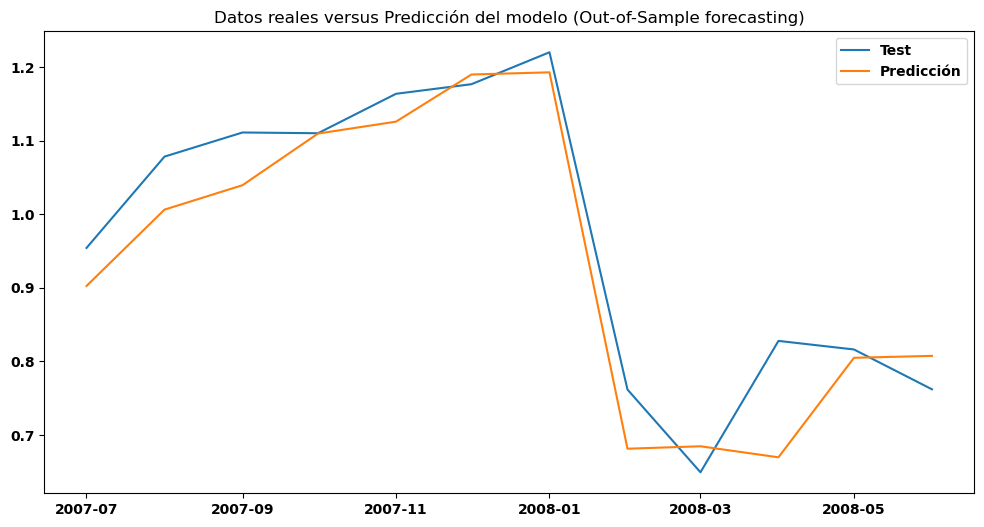

In [45]:
# Ejercicio 28.3.6
plt.plot(df_test, label='Test')
plt.plot(y_pred_catboost_optimo, label='Predicción')
plt.title("Datos reales versus Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

#### Análisis 28.3.6
Podemos observar una aproximación (poco a poco) de ambos conjuntos. Aunque las dos gráficas tienen ciertas diferencias, se observa una tendencia hacia la convergencia, lo que indica una mejora futura del modelo.

In [46]:
# Ejercicio 28.3.7
X_train, y_train = modelo_catboost_optimo.create_train_X_y(df_train['venta_h02'])

In [47]:
fitted_values_catboost = modelo_catboost_optimo.regressor.predict(X_train)

In [48]:
estimacion_catboost = pd.Series(data=np.zeros(df_train.size), index=df_train.index, name='fitted')
indice = len(df_train) - len(fitted_values_catboost)
estimacion_catboost[:indice] = np.nan
estimacion_catboost[indice:] = fitted_values_catboost

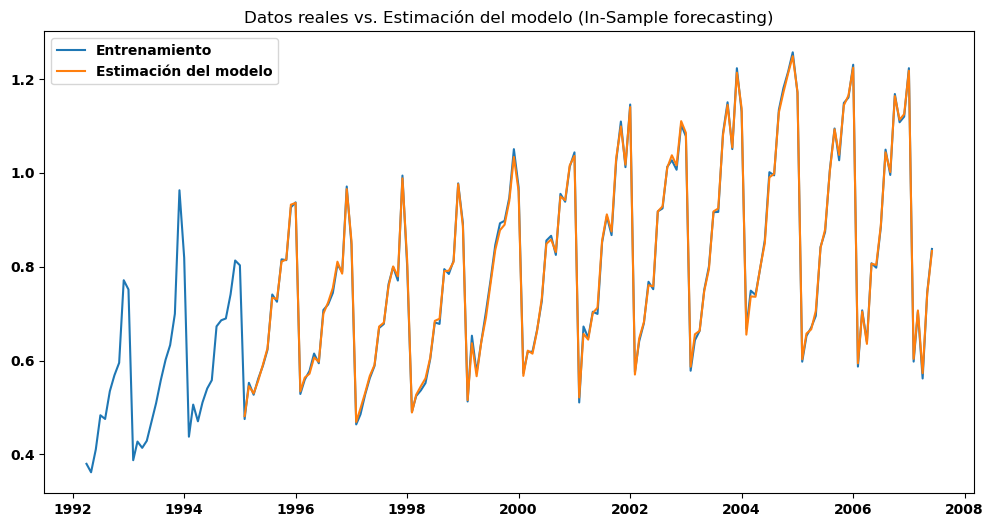

In [49]:
plt.plot(df_train, label='Entrenamiento')
plt.plot(estimacion_catboost, label='Estimación del modelo')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

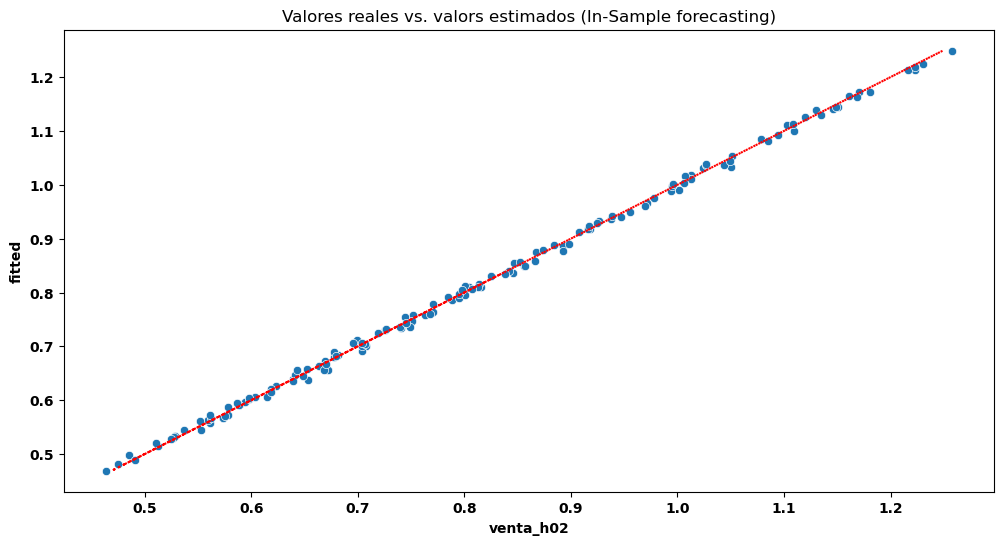

In [50]:
sns.scatterplot(x=df_train['venta_h02'], y=estimacion_catboost)
plt.plot(estimacion_catboost, estimacion_catboost, color='r', linestyle=':')
plt.title("Valores reales vs. valors estimados (In-Sample forecasting)")
plt.show()

In [51]:
resid_catboost = df_train['venta_h02']-estimacion_catboost

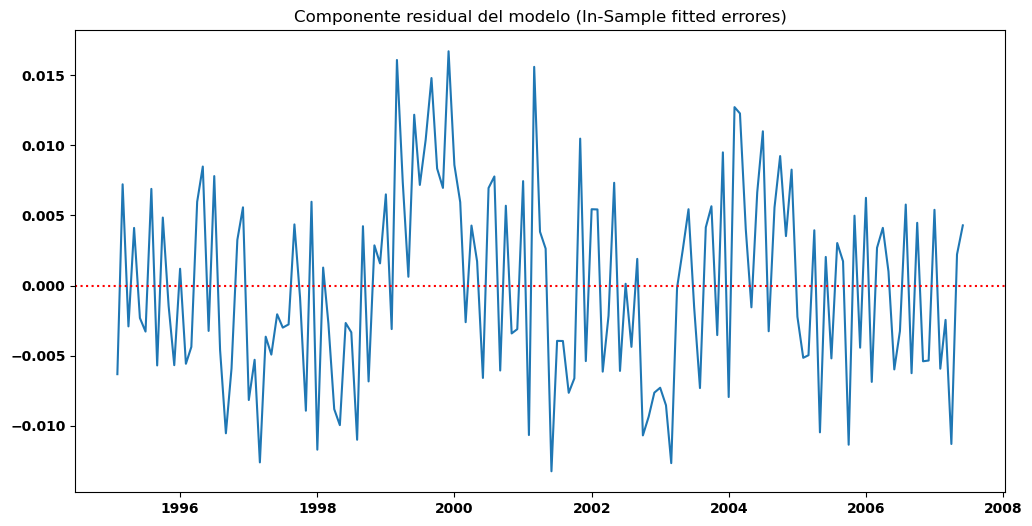

In [52]:
plt.plot(resid_catboost)
plt.title("Componente residual del modelo (In-Sample fitted errores)")
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

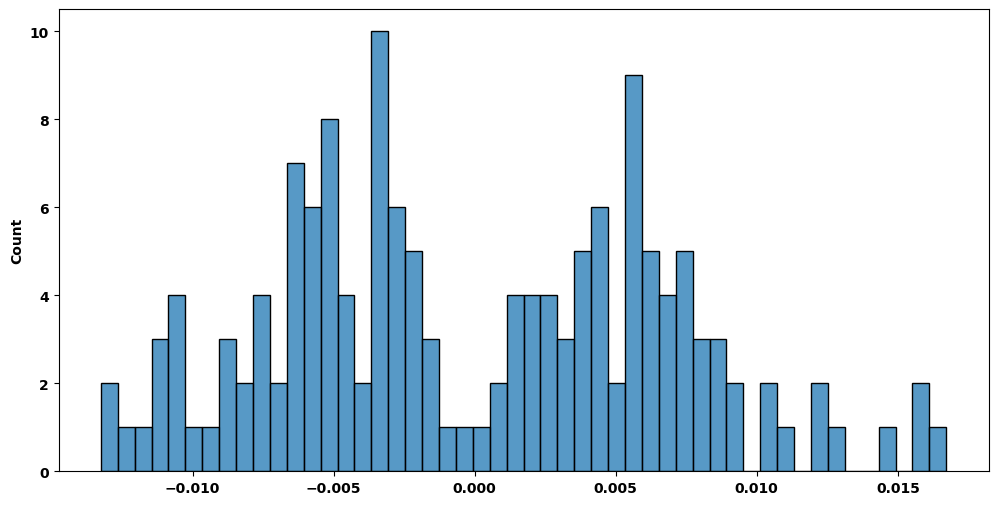

In [53]:
sns.histplot(data=resid_catboost, bins=50)
plt.show()

In [54]:
wins_catboost = 12
resid_catboost_mean = resid_catboost.rolling(wins_catboost).mean().iloc[wins_catboost-1::wins_catboost]
resid_catboost_std = resid_catboost.rolling(wins_catboost).std().iloc[wins_catboost-1::wins_catboost]

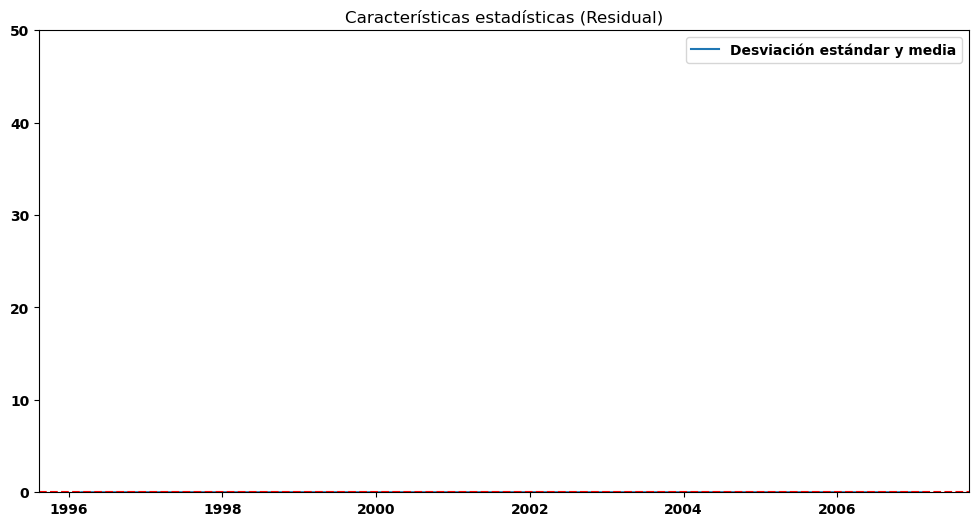

In [55]:
plt.plot(resid_catboost_std, label='Desviación estándar y media')
plt.axhline(y=resid_catboost.std(), color='r', linestyle='--')
plt.title("Características estadísticas (Residual)")
plt.ylim(0,50)
plt.legend()
plt.show()

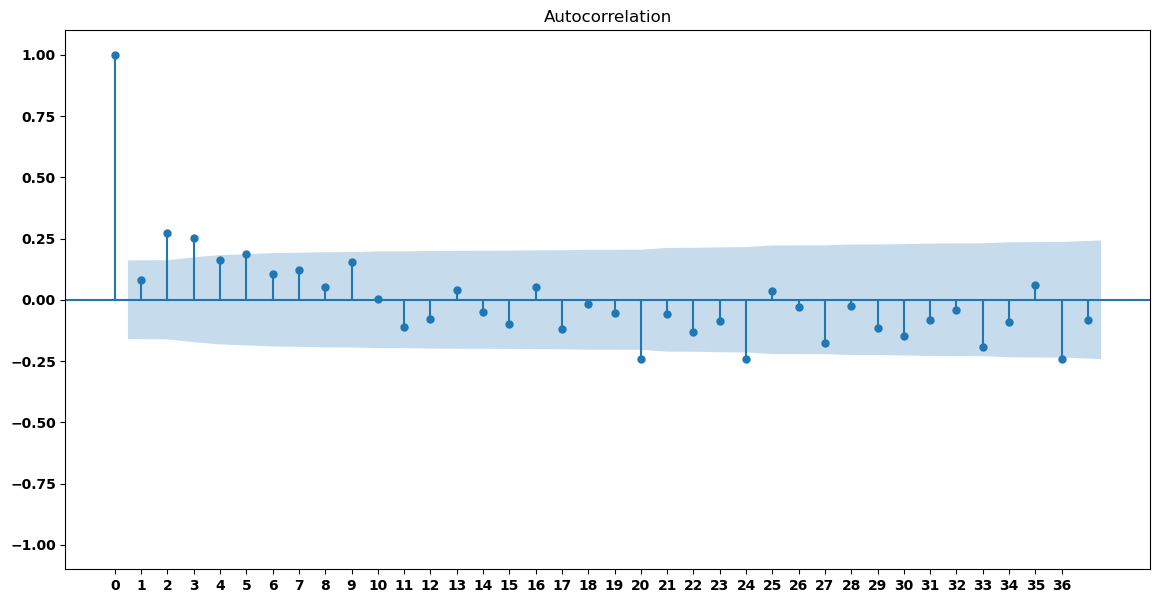

In [56]:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(resid_catboost.dropna(), lags=37)
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

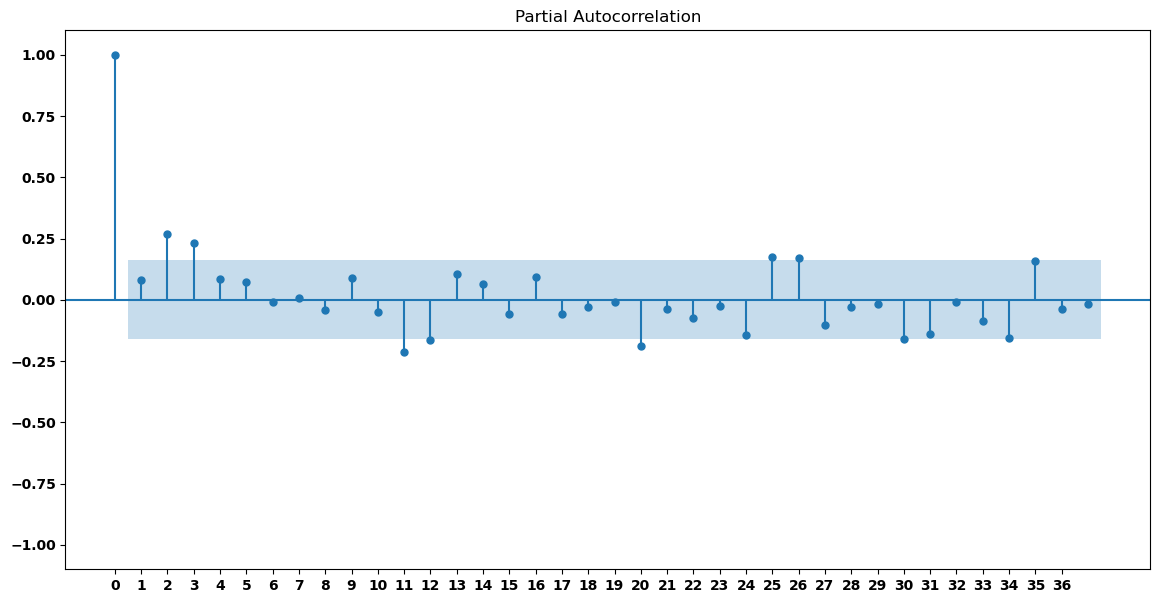

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(resid_catboost.dropna(), lags=37, method='ywm')
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

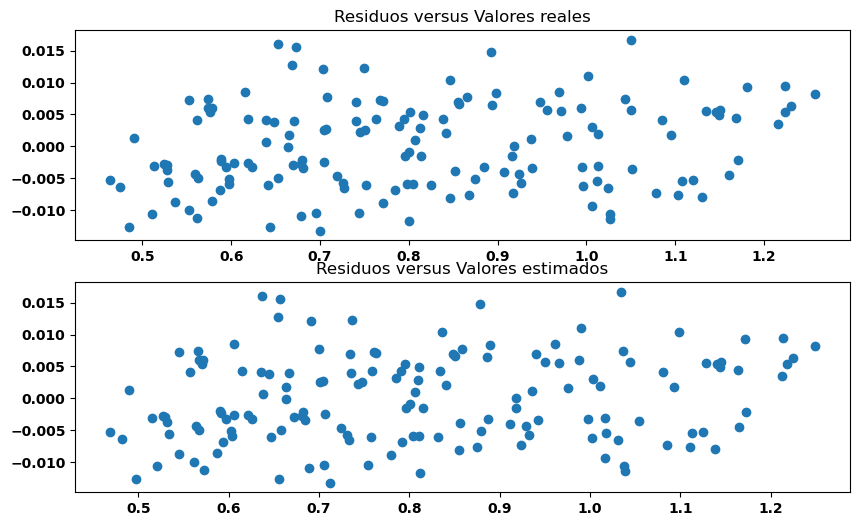

In [58]:
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0].scatter(df_train['venta_h02'], resid_catboost)
ax[0].set_title('Residuos versus Valores reales')
ax[1].scatter(estimacion_catboost, resid_catboost)
ax[1].set_title('Residuos versus Valores estimados')
plt.show()

#### Análisis 28.3.7
En ciertos puntos ambas líneas se superponen, indicando una correlación directa en los valores. El correlograma no muestra patrones visibles, la estandarización revela una serie de picos sin una tendencia clara, y la distribución de los residuos no se ajusta a la forma típica de una curva normal, al menos de una foram tan clara.

In [59]:
# Ejercicio 28.3.8
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
x=pred_autoreg.index,
y=pred_autoreg,
name="Predicción (AR)",
mode="markers+lines"
))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=prediccion_catboost.index,
    y=prediccion_catboost,
    name="Predicción (CatBoostRegressor)",
    mode="markers+lines"
    ))

fig.add_trace(go.Scatter(
    x=prediccion_auto_sarima.index,
    y=prediccion_auto_sarima,
    name="Predicción (SARIMA)",
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas de corticosteroides en Australia",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de dolares'
                  )

fig.show()

## Explicación 28.3.9
Después de evaluar todos los modelos de esta sesión, el CatBoostRegressor sobresale como el más adecuado para este caso específico. Este modelo no solo tiene las métricas más altas, sino que también se acerca mucho a lo que consideraríamos un modelo ideal, le falta solo 0.12 para alcanzar un R^2 perfecto. Respecto a su aplicación práctica, este modelo podría ser beneficioso para el sistema de salud de Australia, ya que permitiría anticipar las ventas mensuales de corticosteroides. Esta previsión facilitaría una planificación más eficiente de la producción y distribución de estos fármacos.

---